In [ ]:
##### Assignmnet - 3 
##### Name - ROHAN RAJKUMAR KOLEWAD
##### PRN no - 230350125066

# Importing Important libraries 

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [3]:
water =  pd.read_csv('water_potability.csv')

## Performing EDA on Selected Dataset

In [4]:
water.shape

(3276, 10)

In [6]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
water.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [9]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Dependent Variable Analysis

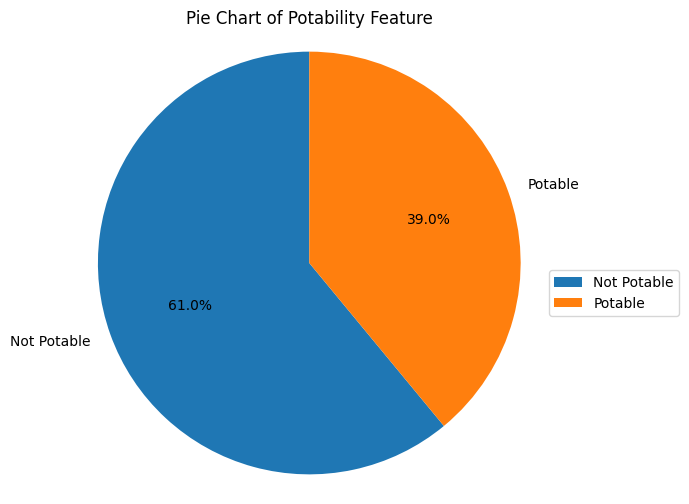

In [10]:
water_potability = water["Potability"].map({0: "Not Potable", 1: "Potable"})
dependent_V = pd.DataFrame(water_potability.value_counts()).reset_index()
dependent_V.columns = ["Potability", "Count"]

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(dependent_V["Count"], labels=dependent_V["Potability"], autopct="%.1f%%", startangle=90)
ax.set_title("Pie Chart of Potability Feature")
ax.axis("equal")
ax.legend(loc="best", bbox_to_anchor=(1, 0.5))
plt.show()

### Correlation Between Features

<Axes: >

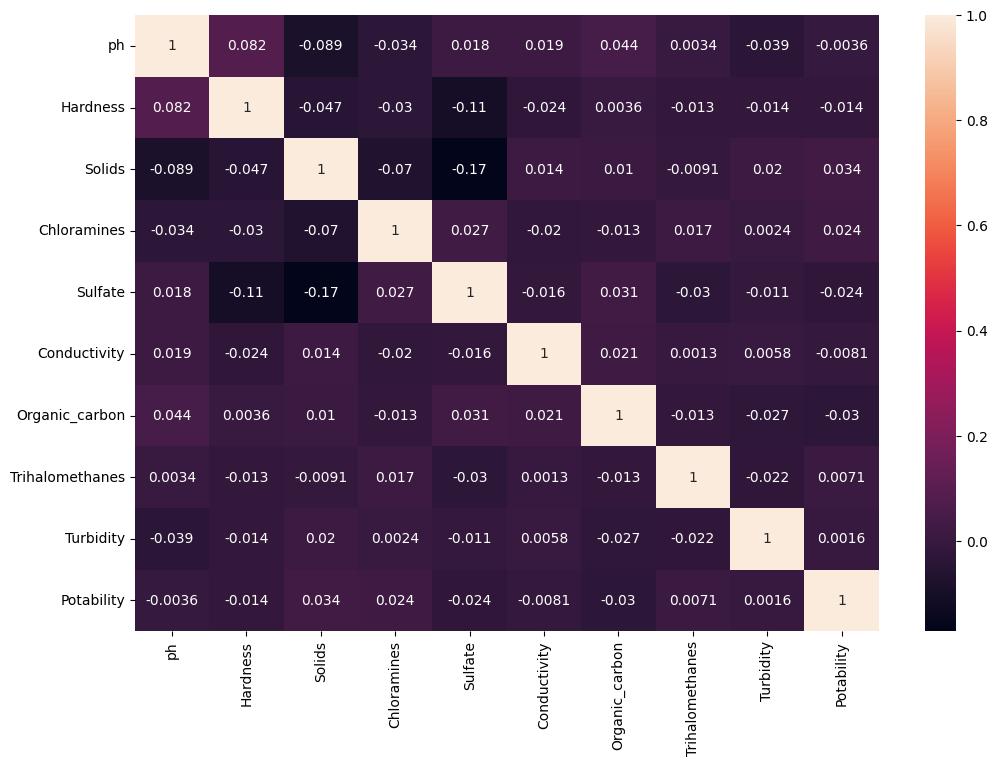

In [11]:
water_corr= water.select_dtypes(include='number').columns
corr= water[water_corr].corr()
corr
plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True)

### Plotting Boxplots for all numerical attributes.

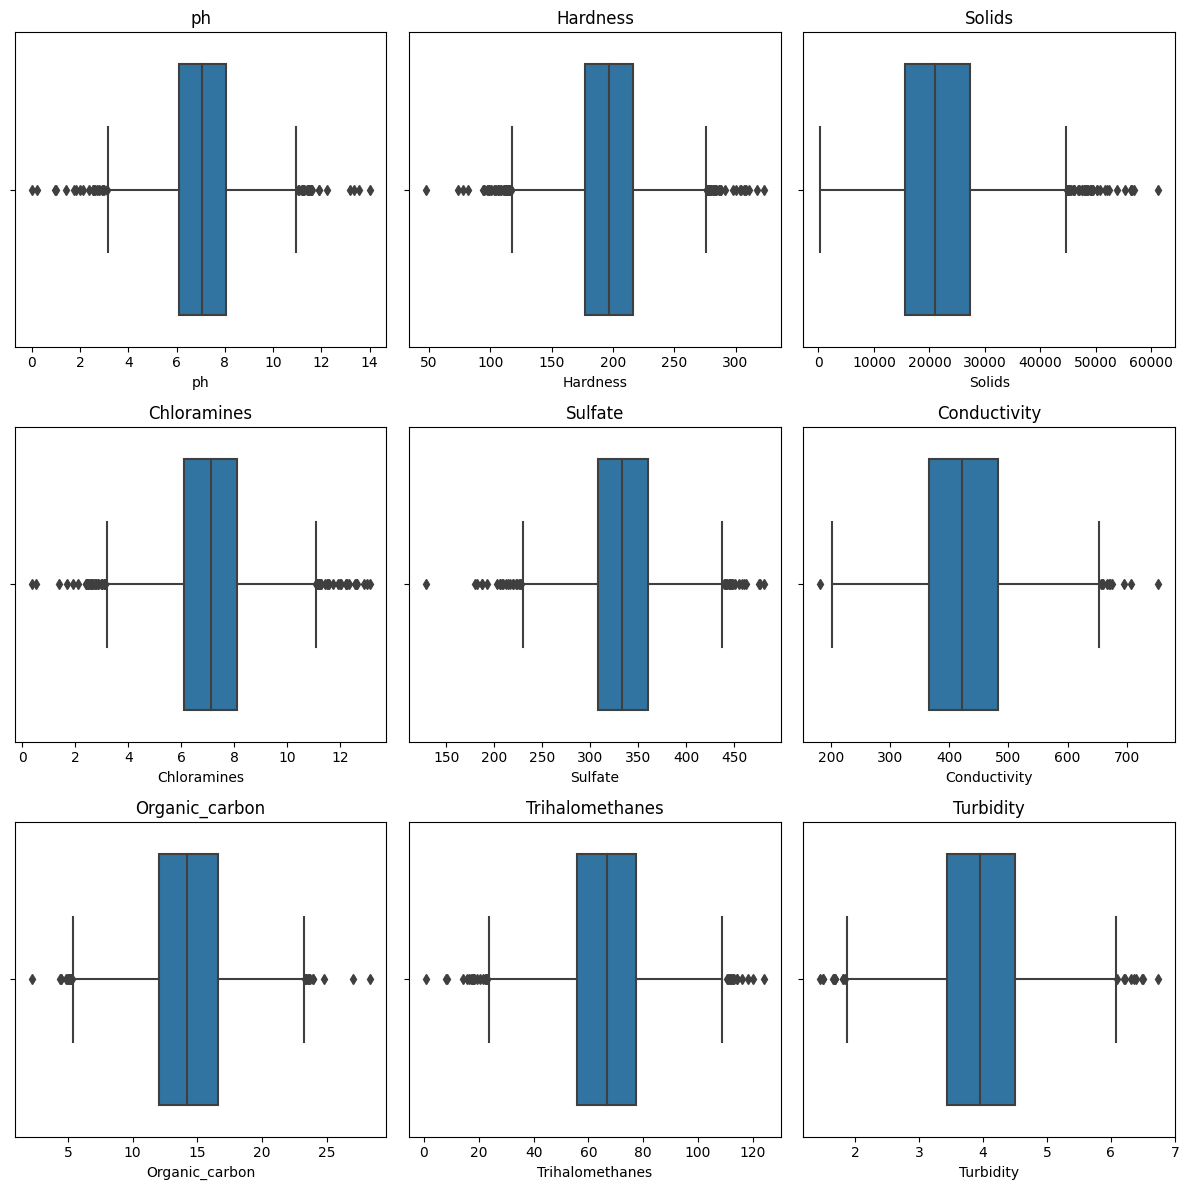

In [12]:
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
           'Conductivity', 'Organic_carbon', 'Trihalomethanes',
           'Turbidity',]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Plot each boxplot on a separate subplot
for ax, column in zip(axes.flatten(), columns):
    sns.boxplot(data=water, x=column, ax=ax)
    ax.set_title(column)
    
    
plt.tight_layout()
plt.show()

### Distribution plots and Dispersion patterns

In [12]:
print(water.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


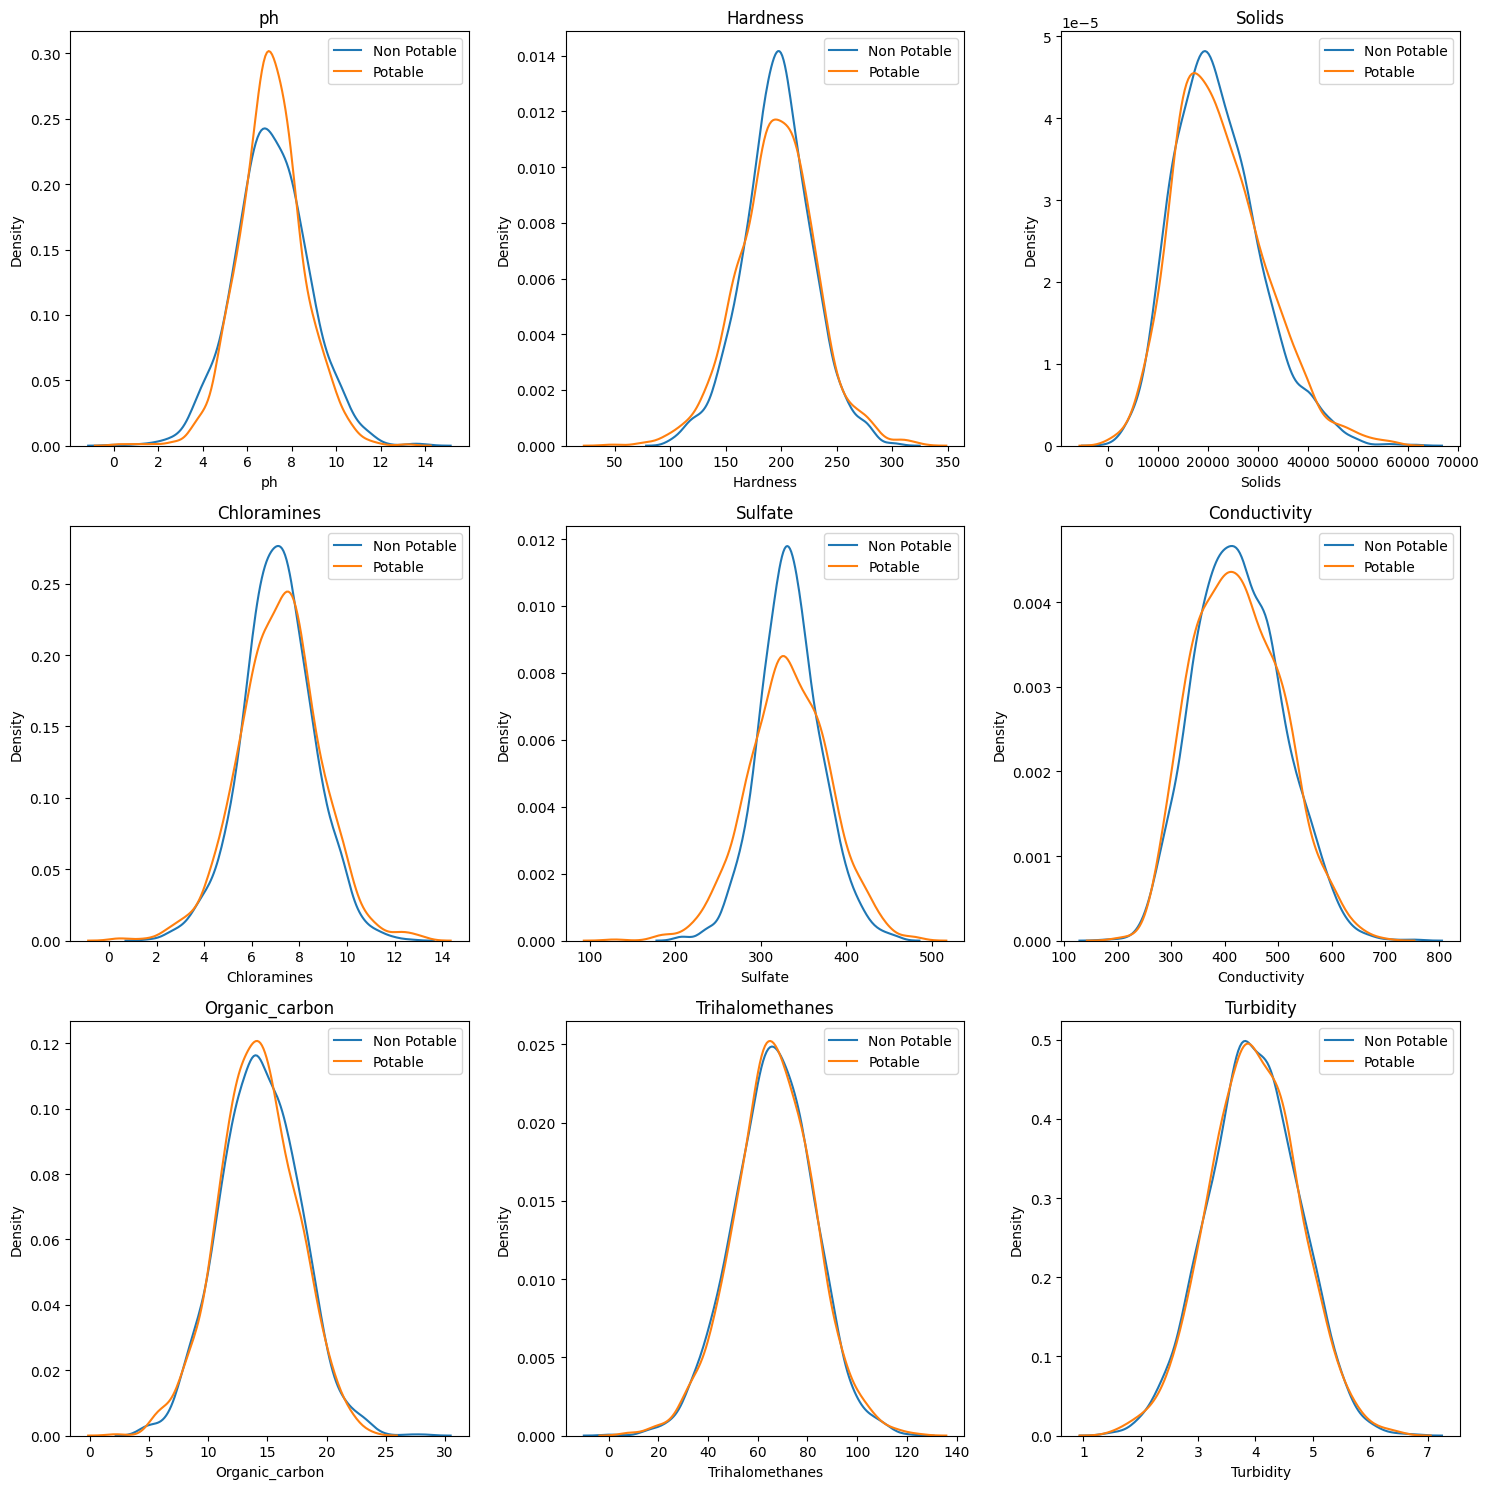

In [13]:
non_potable = water.query("Potability == 0")
potable = water.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(water.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

## Ploting Pairplot 
#### The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. 

In [14]:
# columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
#            'Conductivity', 'Organic_carbon', 'Trihalomethanes',
#            'Turbidity', 'Potability']
# sns.pairplot(water, hue='ph', palette='coolwarm')
# plt.show()

### Obesrving for missing values

In [14]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

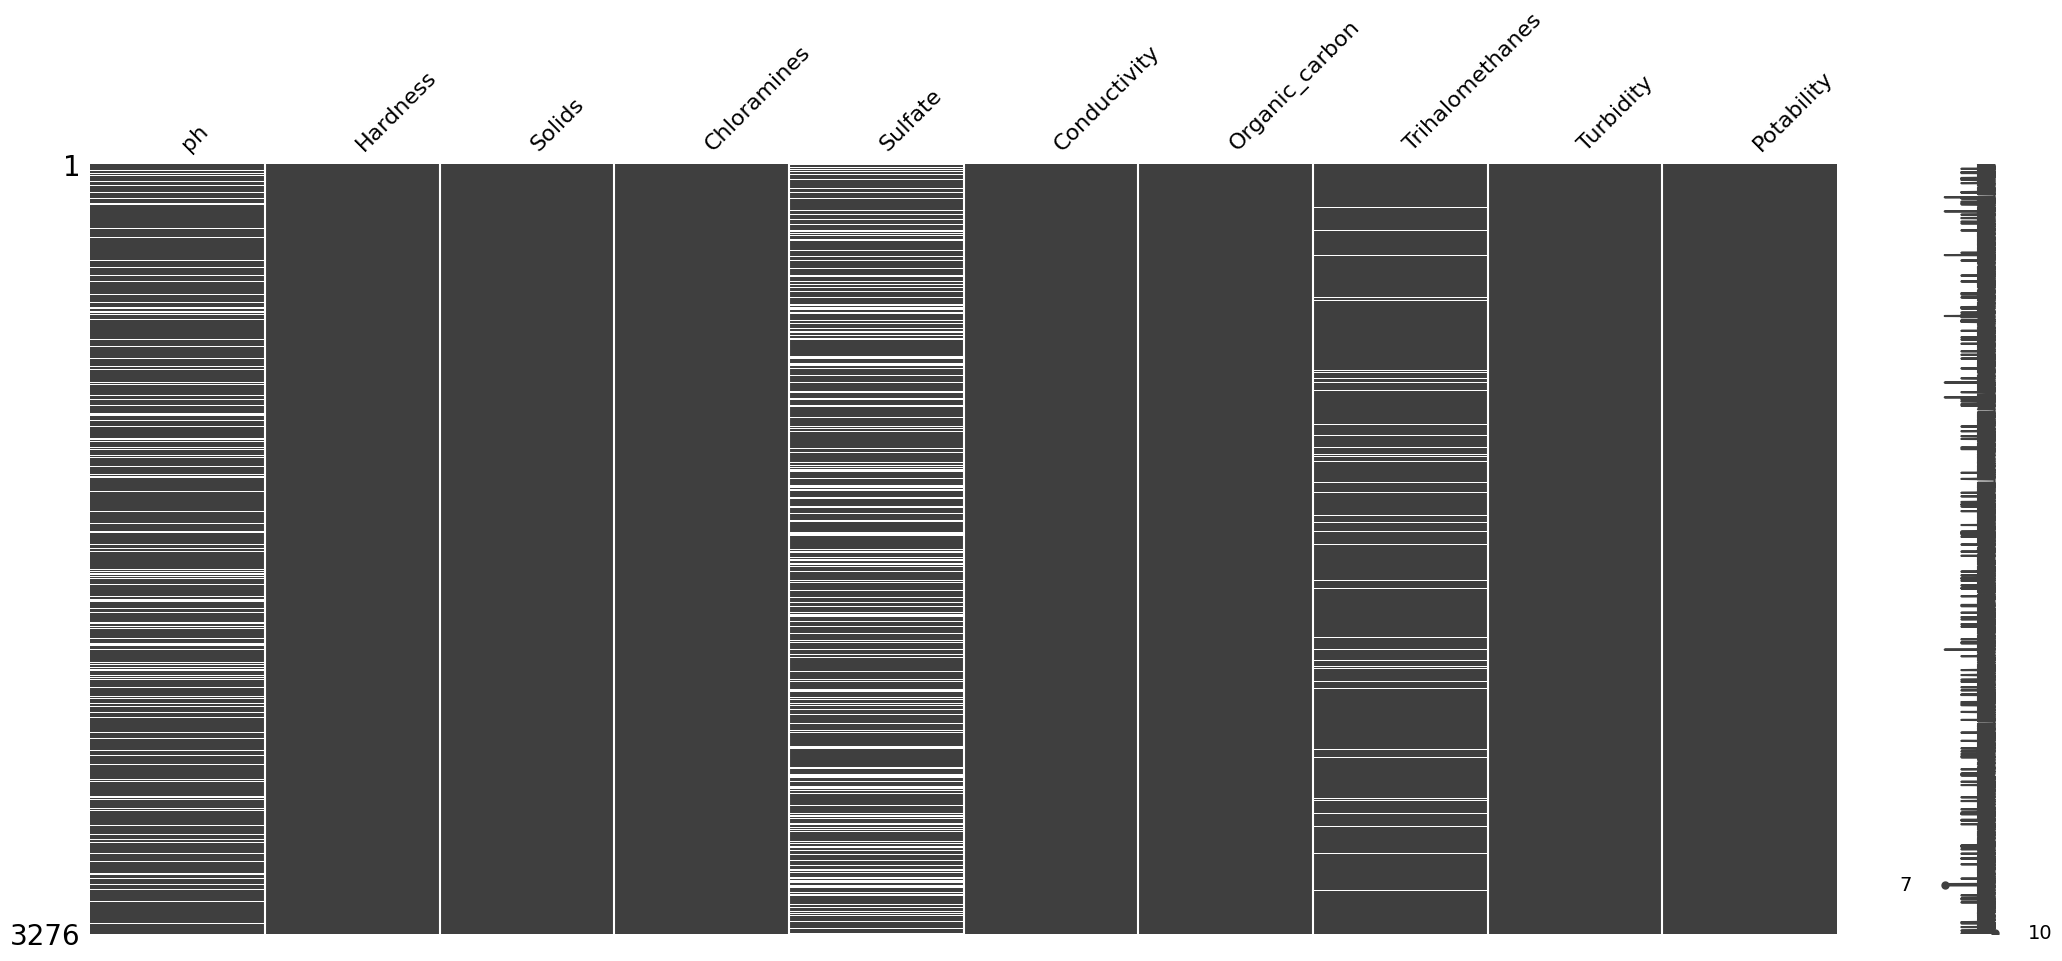

In [15]:
msno.matrix(water)
plt.show()

### Handle missing value with average of features (mean value)

In [16]:
print(water.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [17]:
water['ph'].fillna(value = water['ph'].mean(), inplace = True)
water['Sulfate'].fillna(value = water['Sulfate'].mean(),inplace = True)
water['Trihalomethanes'].fillna(value = water['Trihalomethanes'].mean(),inplace = True)

In [18]:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Preprocessing: Train-Test Split and Normalization

In [19]:
X = water.drop("Potability", axis=1).values
y = water["Potability"].values

#### Train Test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2293, 9)
X_test (983, 9)
y_train (2293,)
y_test (983,)


### Random Forest Classifier

In [33]:
rfc = RandomForestClassifier()

In [34]:
rfc.fit(X_train,y_train)
y_rfc = rfc.predict(X_test)

In [35]:
accuracy_rfc = accuracy_score(y_test, y_rfc)
precision_rfc = precision_score(y_test, y_rfc, average='weighted')
recall_rfc = recall_score(y_test, y_rfc, average='weighted')
f1_rfc = f1_score(y_test, y_rfc, average='weighted')

print("Overall Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1 Score:", f1_rfc)

Overall Accuracy: 0.6531027466937945
Precision: 0.6428530877097688
Recall: 0.6531027466937945
F1 Score: 0.6268852154509426


### Classification report 

In [24]:
rfc_class_report = classification_report(y_rfc,y_test)
print(rfc_class_report)

              precision    recall  f1-score   support

           0       0.86      0.66      0.75       770
           1       0.34      0.61      0.43       213

    accuracy                           0.65       983
   macro avg       0.60      0.64      0.59       983
weighted avg       0.75      0.65      0.68       983



### 2 -  Method using hyperparameter 'class_weight' to balance the label class (1)  To check Any imporovemt in Accuracy and other Matrix

In [25]:
from sklearn.feature_selection import SelectFromModel

# Create and train the Random Forest classifier with adjusted class weights
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc.fit(X_train, y_train)

# Get predicted probabilities of each class
y_pred_proba = rfc.predict_proba(X_test)

# Adjust the decision threshold (e.g., set it to 0.4)
threshold = 0.4
y_pred_1= (y_pred_proba[:, 1] >= threshold).astype(int)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

# Perform feature selection using Random Forest as the estimator
selector = SelectFromModel(rfc)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train the Random Forest classifier on the selected features
rfc_selected = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc_selected.fit(X_train_selected, y_train)

# Get predicted probabilities of each class using the selected features
y_pred_proba_selected = rfc_selected.predict_proba(X_test_selected)

# Adjust the decision threshold (e.g., set it to 0.4)
y_pred_selected = (y_pred_proba_selected[:, 1] >= threshold).astype(int)

accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)

# Print metrics for the model with feature selection
print("Model with Feature Selection:")
print("Overall Accuracy:", accuracy_selected)
print("Precision:", precision_selected)
print("Recall:", recall_selected)
print("F1 Score:", f1_selected)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       595
           1       0.50      0.56      0.53       388

    accuracy                           0.61       983
   macro avg       0.60      0.60      0.60       983
weighted avg       0.62      0.61      0.61       983

Model with Feature Selection:
Overall Accuracy: 0.6368260427263479
Precision: 0.5353075170842825
Recall: 0.6056701030927835
F1 Score: 0.5683192261185005


#### Classification report Random Forest classifier with adjusted class weights

In [27]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

print("Classification Report (with feature selection):")
print(classification_report(y_test, y_pred_selected))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       595
           1       0.50      0.56      0.53       388

    accuracy                           0.61       983
   macro avg       0.60      0.60      0.60       983
weighted avg       0.62      0.61      0.61       983

Classification Report (with feature selection):
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       595
           1       0.54      0.61      0.57       388

    accuracy                           0.64       983
   macro avg       0.63      0.63      0.63       983
weighted avg       0.65      0.64      0.64       983



### Random Search CV Alogorithm To check Any improvemt in Accuracy and other Matrix

#### Random Search:

##### Random search randomly samples the hyperparameter space by selecting a fixed number of random combinations of hyperparameters.It allows more flexibility by exploring a wider range of hyperparameter valuesRandom search is particularly effective when the hyperparameter search space is large or when the impact of different hyperparameters is not well understood.By randomly sampling hyperparameter values, it is more likely to cover a diverse range of combinations, which can lead to better performance compared to an exhaustive grid search. Random search is often more computationally efficient

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid for random search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# Perform random search
random_search = RandomizedSearchCV(rfc, param_grid, n_iter=10, cv=5)

# Fit the random search to training data
random_search.fit(X_train, y_train)

# Get the best estimator from the random search
best_rfc = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Overall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


### Applying Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_gbc = gbc.predict(X_test)

accuracy_gbc = accuracy_score(y_test, y_gbc)
precision_gbc = precision_score(y_test, y_gbc, average='weighted')
recall_gbc = recall_score(y_test, y_gbc, average='weighted')
f1_gbc = f1_score(y_test, y_gbc, average='weighted')

print("Gradient Boosting - Overall Accuracy:", accuracy_gbc)
print("Precision:", precision_gbc)
print("Recall:", recall_gbc)
print("F1 Score:", f1_gbc)

Gradient Boosting - Overall Accuracy: 0.6388606307222787
Precision: 0.6300785693188647
Recall: 0.6388606307222787
F1 Score: 0.5902027894447526


### Classification report for RandomSearchCV

In [ ]:
print(classification_report(y_pred, y_test))

### Creating a DataFrame to store the results:

In [37]:
results = pd.DataFrame({'Model': ['Random Forest','Model with Feature Selection','Random Search'],
                       'Accuracy': [accuracy_rfc, accuracy_selected, accuracy],
                       'Precision': [precision_rfc, precision_selected, precision],
                       'Recall': [recall_rfc, recall_selected, recall],
                       'F1-Score': [f1_rfc, f1_selected, f1]})


# Save the results to a CSV file
results.to_csv('classification_results.csv', index=False)

In [38]:
results

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.656155,0.649445,0.656155,0.622946
1,Model with Feature Selection,0.636826,0.535308,0.605670,0.568319
2,Random Search,0.641913,0.629459,0.641913,0.625957


# Saving the final model

In [63]:
import pickle

# Save the trained Random Forest Classifier to a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)

In [31]:
pip install pipreqs


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13775 sha256=8dfe7b513f56affa3214cce9cf9cce6aa3a6d9f033dff9bfc060ec312230b4a1
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [32]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
